# 

https://www.kaggle.com/datasets/behrad3d/nasa-cmaps/data 

# Scenario 01: Anomaly Detection

In [58]:
import pandas as pd

index_names = ['Unit', 'Cycle']
setting_names = ['op_setting_1', 'op_setting_2', 'op_setting_3']
sensor_names = ['sensor_' + str(i) for i in range(1, 21)]

column_names = index_names + setting_names + sensor_names

# Load data
data = pd.read_csv(
    '../data/raw/train_FD001.txt',
      sep='\s+', 
      header=None, 
      index_col=False, 
      names=column_names,
      )

/var/folders/49/pdpmsz1x33g_s0glp3s0b0wh0000gn/T/ipykernel_75196/1029962863.py:10: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv(


In [59]:
# Visualize data
data.head()

,Unit,Cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

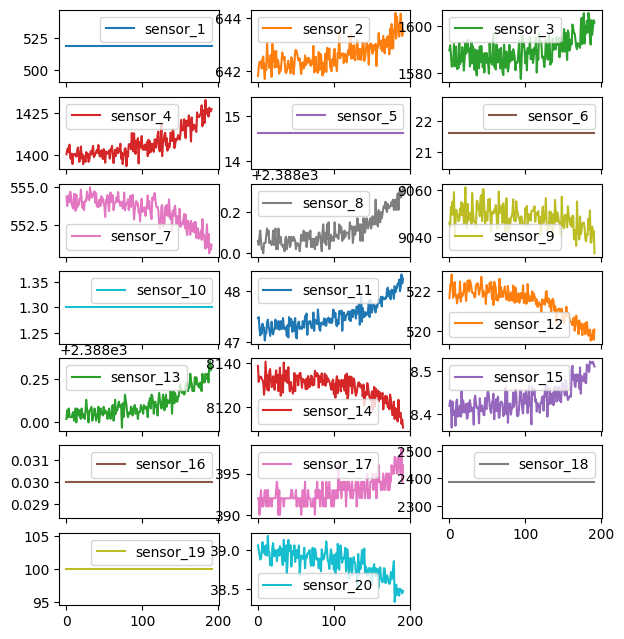

In [60]:
import matplotlib.pyplot as plt

# Plot sensor data for unit 1
data[data["Unit"]==1][data.columns[5:]].plot(subplots=True, figsize=(7, 10), layout=(9, 3))


In [61]:
# Drop columns with constant values
data = data.drop(columns=['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19'])

In [62]:
# List with unique units
units_ = data["Unit"].unique()

# Loop over units
for unit in units_:
    # Add the Moving Average to every sensor 
    data.loc[data["Unit"]==unit, data.columns[2:]] = data.loc[data["Unit"]==unit, data.columns[2:]].rolling(window=5).mean()

# Remove NaN values
data = data.dropna() 

# Reset index
data = data.reset_index(drop=True)

# Display the first 10 rows
data.head(10)           


/var/folders/49/pdpmsz1x33g_s0glp3s0b0wh0000gn/T/ipykernel_75196/500317406.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[  nan   nan   nan   nan 391.8 391.6 391.6 391.8 391.8 391.8 392.  391.8
 392.2 392.4 392.  392.  392.2 392.  391.6 391.8 391.8 391.8 391.8 392.
 392.2 392.6 392.8 392.4 392.6 392.  391.6 391.4 391.8 391.6 391.8 391.8
 391.8 391.8 391.8 392.  392.  392.  392.  392.  392.2 392.4 392.4 392.4
 392.4 392.2 392.2 392.  392.  392.  392.  391.6 391.8 391.4 391.4 391.6
 391.6 391.4 392.2 392.  391.8 391.8 392.2 391.8 392.  392.  392.  391.6
 391.4 391.4 391.4 391.2 391.6 391.8 392.2 392.2 392.6 392.6 392.4 392.
 392.  392.4 392.  392.2 392.2 392.  392.  392.2 392.2 392.4 393.  392.6
 392.6 392.4 392.4 392.  391.8 392.  392.2 392.  392.2 392.4 393.  393.2
 393.6 393.6 393.6 393.2 393.2 393.2 393.2 393.6 393.  393.  393.  393.
 393.  393.4 393.2 393.  393.2 392.8 392.8 393.  393.  393.  39

,Unit,Cycle,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20
0,1,5,-0.00086,-0.00012,100.0,642.208,1587.030,1403.206,554.164,2388.070,9049.566,47.328,522.282,2388.048,8134.194,8.41334,391.8,38.958
1,1,6,-0.00158,-0.00006,100.0,642.264,1585.984,1402.760,554.226,2388.062,9050.264,47.266,522.286,2388.050,8133.040,8.41160,391.6,38.942
2,1,7,-0.00176,0.00002,100.0,642.330,1586.084,1401.686,554.344,2388.058,9053.276,47.240,522.294,2388.042,8133.206,8.40472,391.6,38.962
3,1,8,-0.00158,0.00002,100.0,642.372,1585.078,1401.040,554.262,2388.042,9050.848,47.234,522.304,2388.042,8132.774,8.40268,391.8,38.966
4,1,9,-0.00156,0.00004,100.0,642.326,1586.716,1399.626,554.110,2388.030,9050.244,47.266,522.090,2388.036,8131.146,8.40360,391.8,39.000
5,1,10,-0.00184,0.00010,100.0,642.194,1588.394,1398.474,554.028,2388.028,9049.554,47.216,522.010,2388.040,8130.262,8.40344,391.8,39.010
6,1,11,-0.00062,0.00006,100.0,642.230,1587.850,1398.928,554.002,2388.034,9049.540,47.214,521.954,2388.036,8131.808,8.40808,392.0,39.002
7,1,12,-0.00050,0.00008,100.0,642.146,1586.068,1399.404,554.038,2388.048,9047.588,47.178,521.850,2388.034,8132.194,8.40736,391.8,38.994
8,1,13,-0.00020,0.00010,100.0,642.248,1585.914,1399.376,553.956,2388.072,9048.792,47.206,521.726,2388.044,8131.600,8.40888,392.2,38.986
9,1,14,-0.00018,0.00008,100.0,642.294,1586.308,1400.248,554.114,2388.080,9048.974,47.236,521.702,2388.034,8133.348,8.41360,392.4,39.012


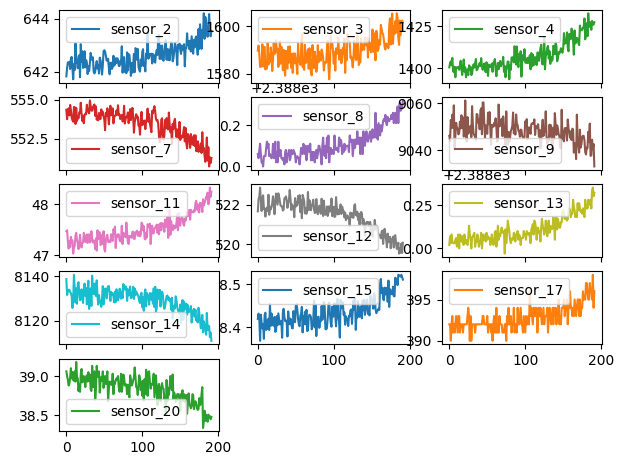

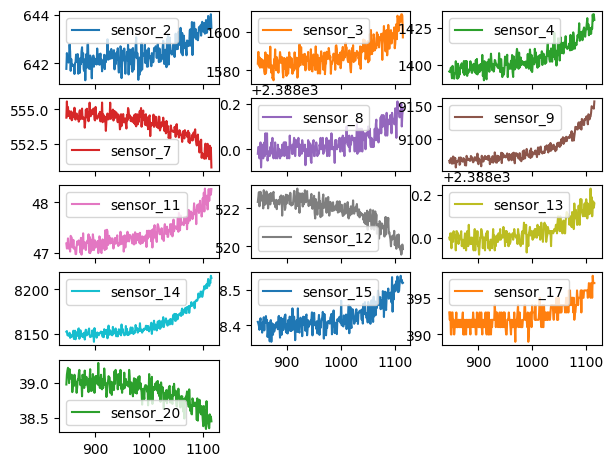

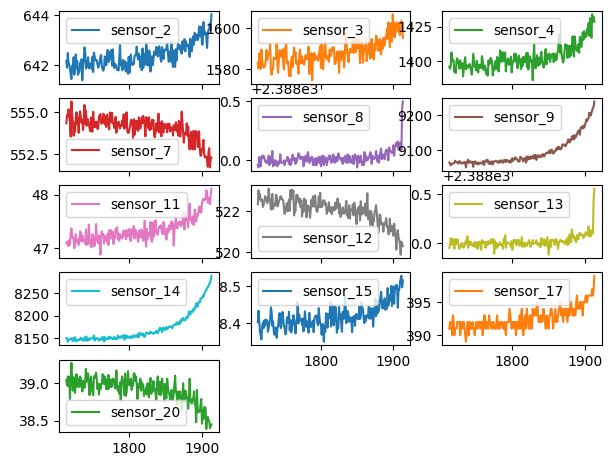

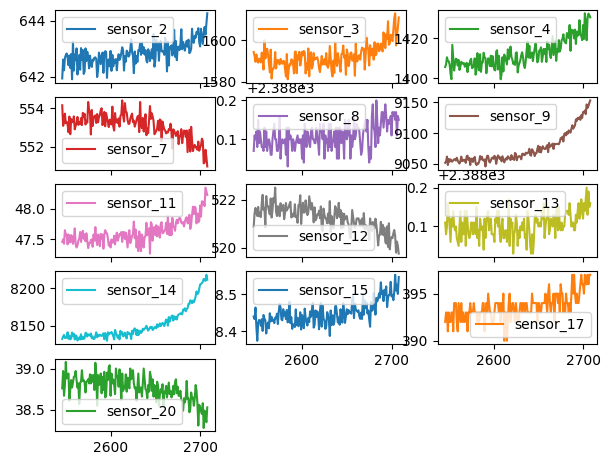

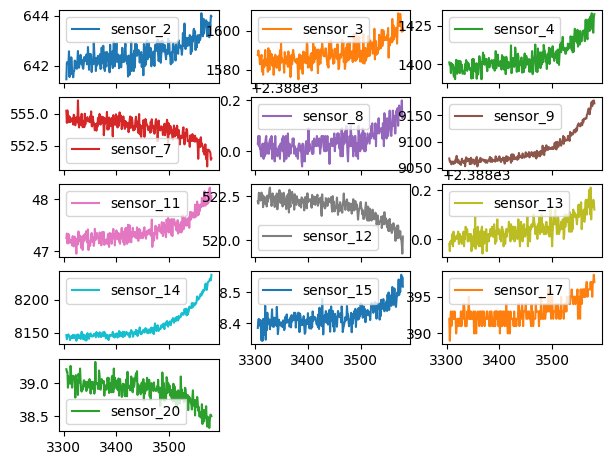

In [38]:
# Plot sensor data for unit 1
for i in range(1, 20, 4):
    data[data["Unit"]==i][data.columns[5:]].plot(subplots=True, figsize=(7, 10), layout=(9, 3))

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

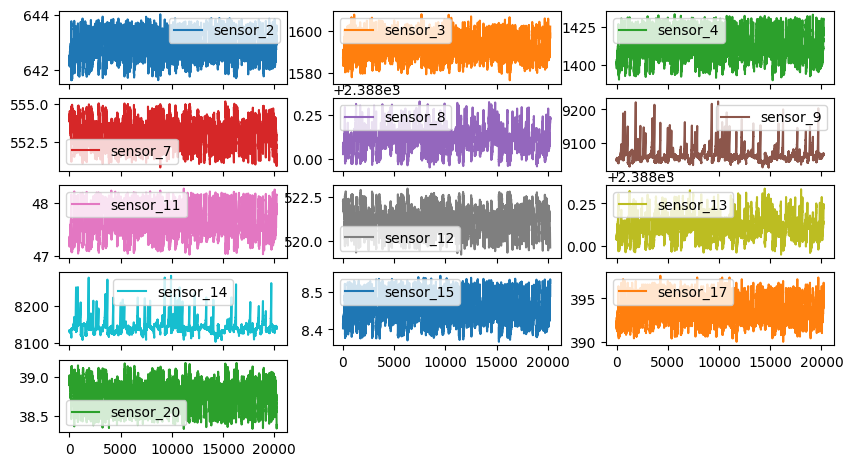

In [63]:
# Plot all units
data[data.columns[5:]].plot(subplots=True, figsize=(10, 10), layout=(9, 3))

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Drop cycle, unit, and settings columns
X = data.drop(columns=['Unit', 'Cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3'])

# Standardize data
scaler = MinMaxScaler()

# Fit and transform data
X_scaled = scaler.fit_transform(X)

# Create a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first 10 rows
X_scaled.head(10)

,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20
0,0.246256,0.338905,0.302721,0.768561,0.311828,0.111697,0.240770,0.816337,0.260204,0.172934,0.264082,0.236842,0.734884
1,0.269551,0.306039,0.292277,0.782768,0.290323,0.115254,0.191011,0.817405,0.265306,0.166440,0.254162,0.210526,0.716279
2,0.297005,0.309181,0.267129,0.809808,0.279570,0.130607,0.170144,0.819541,0.244898,0.167374,0.214937,0.210526,0.739535
3,0.314476,0.277572,0.252002,0.791017,0.236559,0.118231,0.165329,0.822210,0.244898,0.164943,0.203307,0.236842,0.744186
4,0.295341,0.329039,0.218892,0.756187,0.204301,0.115153,0.191011,0.765083,0.229592,0.155780,0.208552,0.236842,0.783721
5,0.240433,0.381763,0.191917,0.737397,0.198925,0.111636,0.150883,0.743727,0.239796,0.150805,0.207640,0.236842,0.795349
6,0.255408,0.364670,0.202548,0.731439,0.215054,0.111564,0.149278,0.728777,0.229592,0.159506,0.234094,0.263158,0.786047
7,0.220466,0.308678,0.213694,0.739688,0.252688,0.101615,0.120385,0.701014,0.224490,0.161678,0.229989,0.236842,0.776744
8,0.262895,0.303840,0.213038,0.720898,0.317204,0.107752,0.142857,0.667912,0.250000,0.158335,0.238655,0.289474,0.767442
9,0.282030,0.316219,0.233457,0.757104,0.338710,0.108679,0.166934,0.661506,0.224490,0.168173,0.265564,0.315789,0.797674


In [65]:
from sklearn.decomposition import PCA
import seaborn as sns

# PCA
pca = PCA(n_components=X.shape[1])

# Fit and transform data
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Explained variance
explained_variance = pca.explained_variance_ratio_


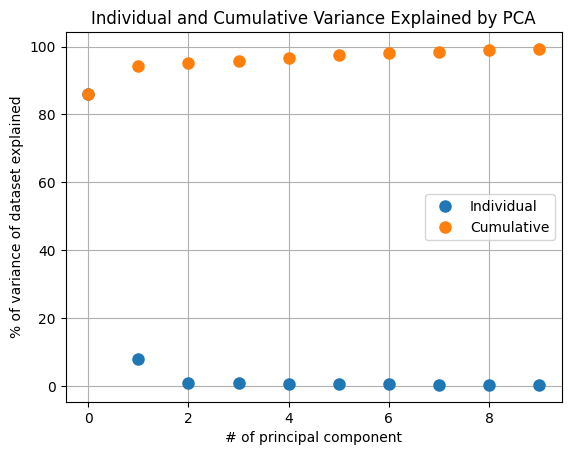

In [66]:
import numpy as np

fig, ax1 = plt.subplots()

individual_var_explained = explained_variance / explained_variance.sum() * 100
cumulative_var_explained = np.cumsum(individual_var_explained)

ax1.plot(individual_var_explained[:10], 'o', markersize=8, label='Individual')
ax1.plot(cumulative_var_explained[:10], 'o', markersize=8, label='Cumulative')
ax1.set_xlabel('# of principal component')
ax1.set_ylabel('% of variance of dataset explained')
ax1.set_title('Individual and Cumulative Variance Explained by PCA')
ax1.legend()
ax1.grid(True)

<Axes: xlabel='PC1', ylabel='PC2'>

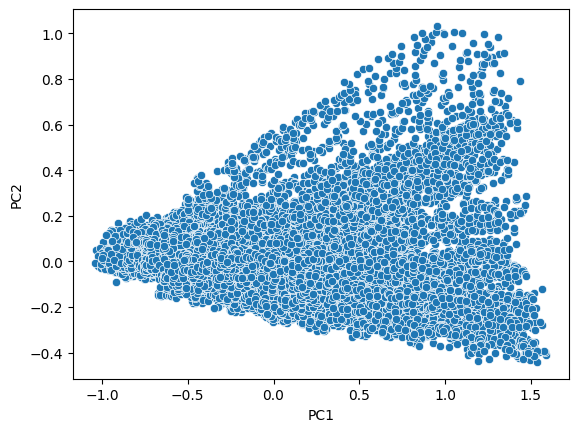

In [67]:
# Plot PCA
sns.scatterplot(x='PC1', y='PC2', data=X_pca)

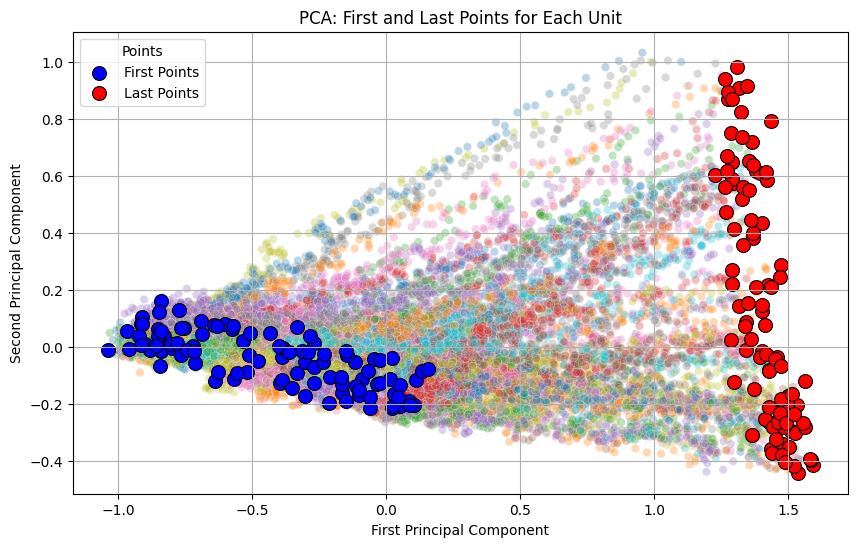

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data and X_pca are pandas DataFrames
# data should contain a 'Unit' column
# X_pca should contain 'PC1' and 'PC2' columns corresponding to the PCA results

# Find first and last point for each engine
idxEngFirst = data.groupby('Unit').head(1).index
idxEngLast = data.groupby('Unit').tail(1).index

# Create a combined index of first and last points
idxEngCombined = idxEngFirst.union(idxEngLast)

# Subset the PCA data for first and last points
X_pca_first_last = X_pca.loc[idxEngCombined]
data_first_last = data.loc[idxEngCombined]

# Separate data for first and last points
X_pca_first = X_pca.loc[idxEngFirst]
X_pca_last = X_pca.loc[idxEngLast]

# Plot PCA with the first and last points of each engine
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=X_pca, hue=data['Unit'], palette='tab10', alpha=0.3, legend=False)
sns.scatterplot(x='PC1', y='PC2', data=X_pca_first, color='blue', s=100, edgecolor='k', label='First Points')
sns.scatterplot(x='PC1', y='PC2', data=X_pca_last, color='red', s=100, edgecolor='k', label='Last Points')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First and Last Points for Each Unit')
plt.legend(title='Points')
plt.grid(True)
plt.show()


/Users/fontana/opt/miniconda3/envs/bi/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


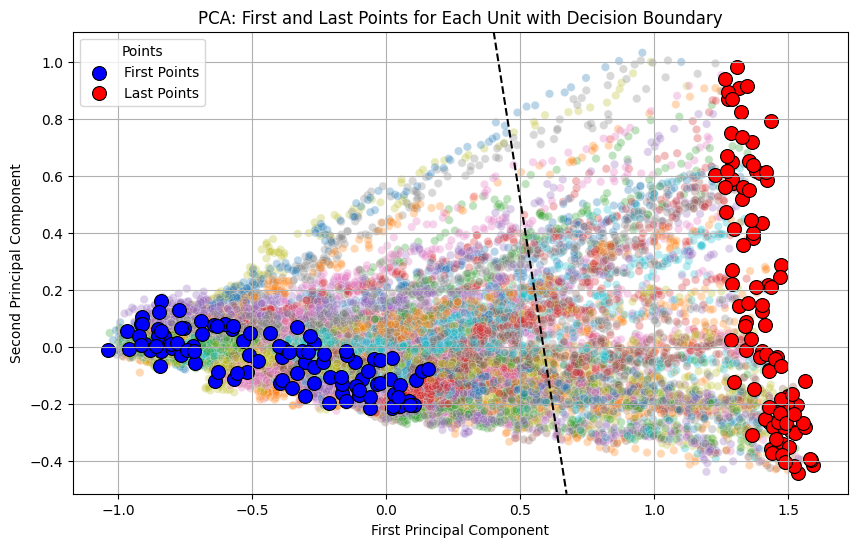

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming data and X_pca are pandas DataFrames
# data should contain a 'Unit' column
# X_pca should contain 'PC1' and 'PC2' columns corresponding to the PCA results

# Find first and last point for each engine
idxEngFirst = data.groupby('Unit').head(1).index
idxEngLast = data.groupby('Unit').tail(1).index

# Create labels for first and last points
labels = np.concatenate([np.zeros(len(idxEngFirst)), np.ones(len(idxEngLast))])

# Combine first and last points
X_combined = pd.concat([X_pca.loc[idxEngFirst], X_pca.loc[idxEngLast]])
y_combined = pd.Series(labels, index=X_combined.index)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_combined[['PC1', 'PC2']], y_combined)

# Define the decision boundary
coef = model.coef_[0]
intercept = model.intercept_

# Plot PCA with the first and last points of each engine
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=X_pca, hue=data['Unit'], palette='tab10', alpha=0.3, legend=False)
sns.scatterplot(x='PC1', y='PC2', data=X_pca.loc[idxEngFirst], color='blue', s=100, edgecolor='k', label='First Points')
sns.scatterplot(x='PC1', y='PC2', data=X_pca.loc[idxEngLast], color='red', s=100, edgecolor='k', label='Last Points')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, levels=[0], colors='k', linestyles='--')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First and Last Points for Each Unit with Decision Boundary')
plt.legend(title='Points')
plt.grid(True)
plt.show()


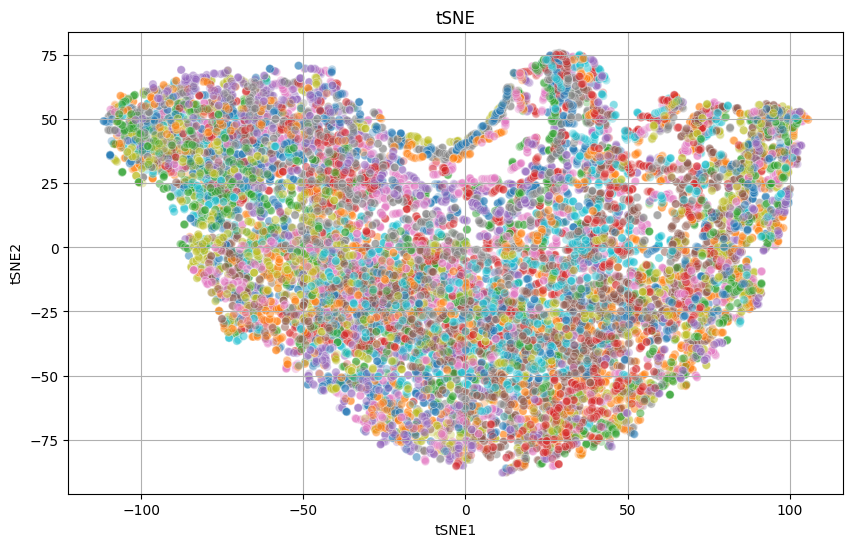

In [77]:
# tSNE
from sklearn.manifold import TSNE

# tSNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform data
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame
X_tsne = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])

# Plot tSNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', data=X_tsne, hue=data['Unit'], palette='tab10', alpha=0.3, legend=False)

plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('tSNE')
plt.grid(True)
plt.show()

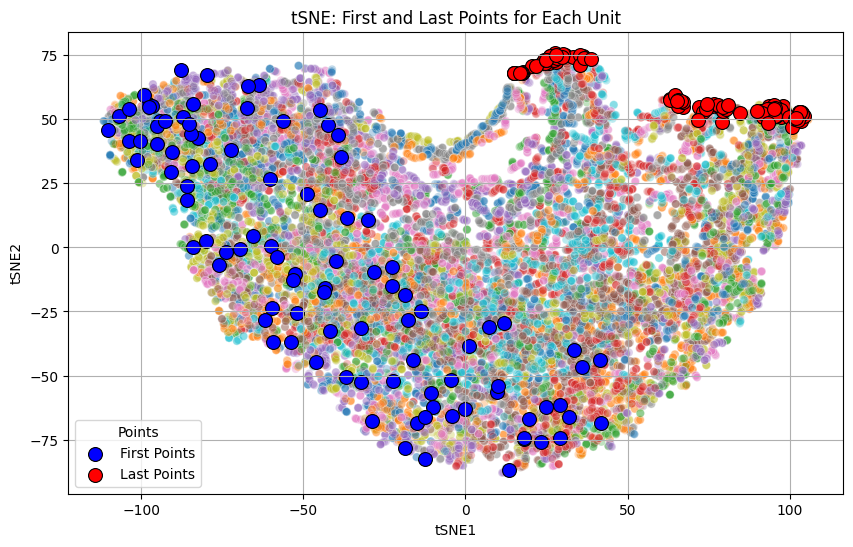

In [78]:
# First and last points for each engine
idxEngFirst = data.groupby('Unit').head(1).index
idxEngLast = data.groupby('Unit').tail(1).index

# Create a combined index of first and last points
idxEngCombined = idxEngFirst.union(idxEngLast)

# Subset the tSNE data for first and last points
X_tsne_first_last = X_tsne.loc[idxEngCombined]
data_first_last = data.loc[idxEngCombined]

# Separate data for first and last points
X_tsne_first = X_tsne.loc[idxEngFirst]
X_tsne_last = X_tsne.loc[idxEngLast]

# Plot tSNE with the first and last points of each engine
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', data=X_tsne, hue=data['Unit'], palette='tab10', alpha=0.3, legend=False)
sns.scatterplot(x='tSNE1', y='tSNE2', data=X_tsne_first, color='blue', s=100, edgecolor='k', label='First Points')
sns.scatterplot(x='tSNE1', y='tSNE2', data=X_tsne_last, color='red', s=100, edgecolor='k', label='Last Points')

plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('tSNE: First and Last Points for Each Unit')
plt.legend(title='Points')
plt.grid(True)
plt.show()
